# Sentiment Analysis
Simple CNN-LSTM model for sequence classification

In [52]:
# import libraries
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Conv1D
from tensorflow.keras.layers import Dense, MaxPooling1D, Embedding
from tensorflow.keras.preprocessing import sequence

# set the random seed for reprocible results
tf.random.set_seed(42)

In [56]:
# load 5000 top words from the dataset
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)

In [57]:
# truncate and pad review sequences
max_review_length = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_review_length)
X_test = sequence.pad_sequences(X_test, maxlen=max_review_length)

In [58]:
# define the CNN-LSTM model
embedding_vector_length = 32
model = Sequential()
model.add(Embedding(top_words, embedding_vector_length, input_length=max_review_length))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))


In [59]:
# compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 500, 32)           160000    
                                                                 
 conv1d_2 (Conv1D)           (None, 500, 32)           3104      
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 250, 32)          0         
 1D)                                                             
                                                                 
 lstm_2 (LSTM)               (None, 100)               53200     
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 216,405
Trainable params: 216,405
Non-trainable params: 0
________________________________________________

In [60]:
# train the model
history = model.fit(X_train, y_train, epochs=3, batch_size=64)

Epoch 1/3
391/391 [==============================] - 116s 290ms/step - loss: 0.4321 - accuracy: 0.7842
Epoch 2/3
391/391 [==============================] - 113s 288ms/step - loss: 0.2460 - accuracy: 0.9008
Epoch 3/3
391/391 [==============================] - 113s 288ms/step - loss: 0.1912 - accuracy: 0.9280


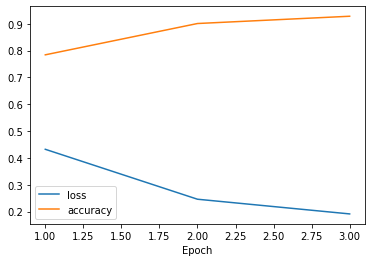

In [61]:
import matplotlib.pyplot as plt
epoch = [1, 2, 3]
plt.figure()
plt.plot(epoch, history.history['loss'], label='loss')
plt.plot(epoch, history.history['accuracy'], label='accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [63]:
# evaluate the model
scores = model.evaluate(X_test, y_test, verbose=0)
scores

[0.297811895608902, 0.8795199990272522]

In [64]:
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 87.95%
